# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)



## Generate Cities List

In [2]:
#List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))

603


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#API Info

url = "https://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [23]:
#Loop through the randomly selected cities in the CSV file and get the weather data
city_name = []
id_number = []
lat = []
lon = []
max_temp = []
humidity = []
clouds = []
wind_speed = []
country = []
date = []

cities_weather = []

for city in cities:  #[0:10]
    try: 
        weather_response = requests.get(query_url + city)
        weather_json = weather_response.json()
        time.sleep(1)
        city_name = (weather_json['name'])
        id_number = (weather_json['id'])
        lat = (weather_json["coord"]["lat"])
        lon = (weather_json["coord"]["lon"])
        max_temp = (weather_json["main"]["temp_max"])
        humidity = (weather_json["main"]["humidity"])
        clouds = (weather_json["clouds"]["all"])
        wind_speed = (weather_json["wind"]["speed"])
        country = (weather_json["sys"]["country"])
        date = (weather_json["dt"])
        cities_weather.append({"City Name": city_name,
                  "Lat": lat,
                  "Lon": lon,
                  "Max Temp": max_temp,
                  "Humidity": humidity,
                  "Cloudiness": clouds,
                  "Wind Speed": wind_speed,
                  "Country": country,
                  "Date": date})
                
        print(f"City ID and City Name: {id_number} {city_name}")
        
    except:
        print("Keyerror ignore")
        pass

City ID and City Name: 3471451 Arraial do Cabo
City ID and City Name: 1504382 Kargasok
City ID and City Name: 3831208 Qaanaaq
City ID and City Name: 3424607 Tasiilaq
City ID and City Name: 3652764 Puerto Ayora
Keyerror ignore
City ID and City Name: 4034551 Faanui
City ID and City Name: 6201424 Mataura
City ID and City Name: 2022572 Khatanga
City ID and City Name: 986717 Kruisfontein


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
#Create a dataframe from the weather info

cities_weather_df = pd.DataFrame(cities_weather)
cities_weather_df

,City Name,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Arraial do Cabo,-22.9661,-42.0278,73.36,60,75,9.22,BR,1633712355
1,Kargasok,59.0556,80.8572,40.89,85,88,13.56,RU,1633712469
2,Qaanaaq,77.4840,-69.3632,23.83,71,95,6.55,GL,1633712470
3,Tasiilaq,65.6145,-37.6368,34.03,50,81,11.01,GL,1633712362
4,Puerto Ayora,-0.7393,-90.3518,71.55,88,99,8.99,EC,1633712473
...,...,...,...,...,...,...,...,...,...
556,Inírida,3.8653,-67.9239,91.51,52,74,1.81,CO,1633713341
557,Moree,-29.4667,149.8500,57.22,77,0,10.36,AU,1633713342
558,San Cristobal,7.7669,-72.2250,80.78,59,84,7.00,VE,1633713338
559,Port Hardy,50.6996,-127.4199,48.38,81,90,12.66,CA,1633713345


In [6]:
cities_weather_df.to_csv("../cities_weather.csv")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
#Find humidity greater than 100%
high_humidity = cities_weather_df.loc[cities_weather_df["Humidity"] > 100]
high_humidity


,City Name,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [8]:
#There are no cities with humidity greater than 100%

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

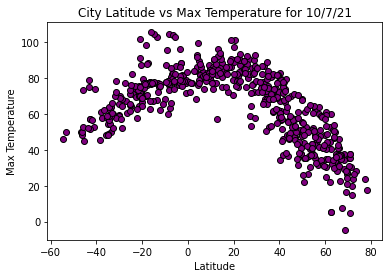

In [9]:
x_values = cities_weather_df["Lat"]
y_values = cities_weather_df["Max Temp"]
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.title("City Latitude vs Max Temperature")
plt.scatter(x_values, y_values, marker = "o", facecolors = "purple", edgecolors="black")
plt.savefig("../Temp_plot.png")
plt.show()

In [ ]:
#The data is showing the relationship between the latitude of each city and the max temperature of each city.
#Conclusion #1:
    #The closer the city is to latitude 0 or to the equater the higher the max temperatures.  Latitudes further away from 0
    #have a lower max temp.  This plot is showing the trend very well with few cities that deviate from the norm.

## Latitude vs. Humidity Plot

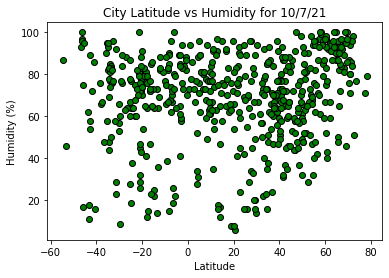

In [10]:
x_values = cities_weather_df["Lat"]
y_values = cities_weather_df["Humidity"]
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs Humidity")
plt.scatter(x_values, y_values, marker = "o", facecolors = "green", edgecolors="black")
plt.savefig("../Humidity_plot.png")
plt.show()

In [ ]:
#The latitude vs humidity is showing how latitude could affect the humidity of the city.  There is a little bit of a trend
#in the this plot.
#Conclusion #2:
    #It seems like more cities in the northern hemisphere have higher humidity.  Also, the further the city is from the equater
    #the more humid it is.  This is not something I would have guessed.  I would think cities closer to the equater would have
    #higher humidity.

## Latitude vs. Cloudiness Plot

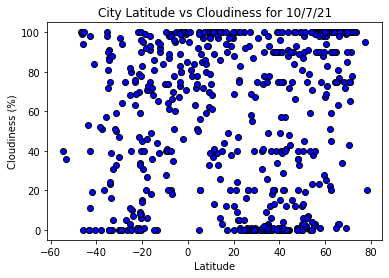

In [11]:
x_values = cities_weather_df["Lat"]
y_values = cities_weather_df["Cloudiness"]
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs Cloudiness")
plt.scatter(x_values, y_values, marker = "o", facecolors = "blue", edgecolors="black")
plt.savefig("../Cloudiness_plot.png")
plt.show()

In [ ]:
#The latitude vs cloudiness plot shows how the latitude of a city could produce more or less percentage of clouds.
#Conclusion #3:
    #This info could vary greatly day by day and would be more useful if there was cumulative data collected throughout the year.
    #It might be better to see if latitude affected the cloudiness based on averge daily cloud cover for 1 year.

## Latitude vs. Wind Speed Plot

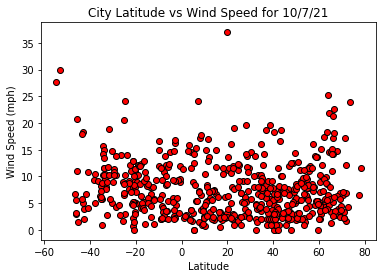

In [12]:
x_values = cities_weather_df["Lat"]
y_values = cities_weather_df["Wind Speed"]
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs Wind Speed")
plt.scatter(x_values, y_values, marker = "o", facecolors = "red", edgecolors="black")
plt.savefig("../Wind_speed_plot.png")
plt.show()

In [ ]:
#Wind speed based on latitude - it seems like all of these, cities no matter the latitude,
#are falling into a wind speed range of 0 to 15 mph with very few of them with higher wind speeds.

## Linear Regression

In [13]:
#Dataframe for cities in northern hemisphere 
northern_cities = cities_weather_df.loc[cities_weather_df["Lat"] >= 0]
northern_cities

,City Name,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,Kargasok,59.0556,80.8572,40.89,85,88,13.56,RU,1633712469
2,Qaanaaq,77.4840,-69.3632,23.83,71,95,6.55,GL,1633712470
3,Tasiilaq,65.6145,-37.6368,34.03,50,81,11.01,GL,1633712362
7,Khatanga,71.9667,102.5000,23.47,98,100,1.59,RU,1633712479
12,Nikolskoye,59.7035,30.7861,48.40,67,67,5.44,RU,1633712413
...,...,...,...,...,...,...,...,...,...
553,Aykhal,66.0000,111.5000,30.76,90,98,21.30,RU,1633713335
556,Inírida,3.8653,-67.9239,91.51,52,74,1.81,CO,1633713341
558,San Cristobal,7.7669,-72.2250,80.78,59,84,7.00,VE,1633713338
559,Port Hardy,50.6996,-127.4199,48.38,81,90,12.66,CA,1633713345


In [14]:
#Dataframe for cities in southern hemisphere 
southern_cities = cities_weather_df.loc[cities_weather_df["Lat"] < 0]
southern_cities

,City Name,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Arraial do Cabo,-22.9661,-42.0278,73.36,60,75,9.22,BR,1633712355
4,Puerto Ayora,-0.7393,-90.3518,71.55,88,99,8.99,EC,1633712473
5,Faanui,-16.4833,-151.7500,77.76,72,91,5.28,PF,1633712476
6,Mataura,-46.1927,168.8643,49.48,100,100,2.91,NZ,1633712477
8,Kruisfontein,-34.0033,24.7314,59.88,85,23,11.63,ZA,1633712480
...,...,...,...,...,...,...,...,...,...
545,Kiunga,-6.1219,141.2906,74.08,100,96,2.01,PG,1633713322
547,Trairi,-3.2778,-39.2689,86.22,61,89,14.70,BR,1633713251
554,Serenje,-13.2325,30.2352,72.05,36,65,4.45,ZM,1633713338
555,Majene,-3.5403,118.9707,78.82,84,83,5.23,ID,1633713339


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7159368529515907


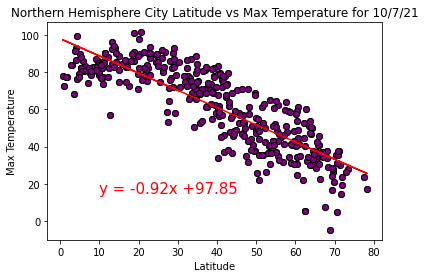

In [15]:
x_values = northern_cities["Lat"]
y_values = northern_cities["Max Temp"]
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.title("Northern Hemisphere City Latitude vs Max Temperature for 10/7/21")
plt.scatter(x_values, y_values, marker = "o", facecolors = "purple", edgecolors="black")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values, y_values, marker = "o", facecolors="purple", edgecolors="black")
plt.plot(x_values,regress_values,"r-")


plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.title("Northern Hemisphere City Latitude vs Max Temperature")
plt.annotate(line_eq,(10,15),fontsize=15,color="red")


print(f"The r-value is: {rvalue**2}")
plt.savefig("../Northern_temp_plot.png")

plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.48613017230915434


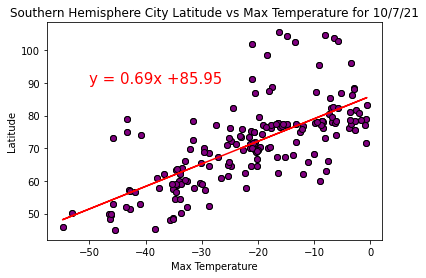

In [16]:
x_values = southern_cities["Lat"]
y_values = southern_cities["Max Temp"]
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.title("Southern Hemisphere City Latitude vs Max Temperature for 10/7/21")
plt.scatter(x_values, y_values, marker = "o", facecolors = "purple", edgecolors="black")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values, y_values, marker = "o", facecolors="purple", edgecolors="black")
plt.plot(x_values,regress_values,"r-")


plt.xlabel("Max Temperature")
plt.ylabel("Latitude")
plt.title("Southern Hemisphere City Latitude vs Max Temperature")
plt.annotate(line_eq,(-50,90),fontsize=15,color="red")


print(f"The r-value is: {rvalue**2}")

plt.savefig("../Southern_temp_plot.png")

plt.show()



####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.05874372178888032


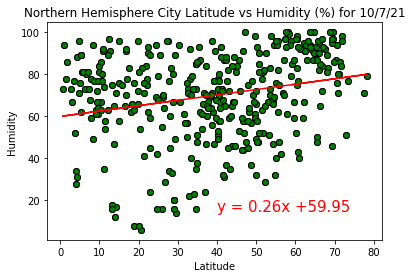

In [17]:
x_values = northern_cities["Lat"]
y_values = northern_cities["Humidity"]
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Northern Hemisphere City Latitude vs Humidity (%) for 10/7/21")
plt.scatter(x_values, y_values, marker = "o", facecolors = "green", edgecolors="black")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values, y_values, marker = "o", facecolors="green", edgecolors="black")
plt.plot(x_values,regress_values,"r-")


plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Northern Hemisphere City Latitude vs Humidity (%)")
plt.annotate(line_eq,(40,15),fontsize=15,color="red")


print(f"The r-value is: {rvalue**2}")

plt.savefig("../Northern_humidity_plot.png")

plt.show()


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.0008143262184046819


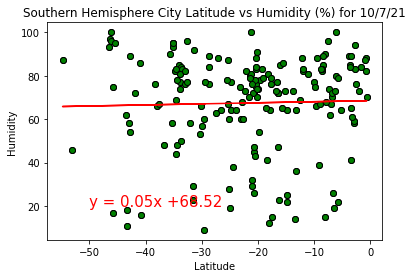

In [18]:
x_values = southern_cities["Lat"]
y_values = southern_cities["Humidity"]
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Southern Hemisphere City Latitude vs Humidity for 10/7/21")
plt.scatter(x_values, y_values, marker = "o", facecolors = "green", edgecolors="black")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values, y_values, marker = "o", facecolors="green", edgecolors="black")
plt.plot(x_values,regress_values,"r-")


plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Southern Hemisphere City Latitude vs Humidity (%)")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")


print(f"The r-value is: {rvalue**2}")

plt.savefig("../Southern_humidity_plot.png")

plt.show()



####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.006847816840313065


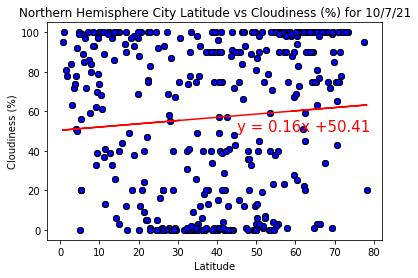

In [19]:
x_values = northern_cities["Lat"]
y_values = northern_cities["Cloudiness"]
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Northern Hemisphere City Latitude vs Cloudiness (%) for 10/7/21")
plt.scatter(x_values, y_values, marker = "o", facecolors = "blue", edgecolors="black")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values, y_values, marker = "o", facecolors="blue", edgecolors="black")
plt.plot(x_values,regress_values,"r-")


plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Northern Hemisphere City Latitude vs Cloudiness (%)")
plt.annotate(line_eq,(45,50),fontsize=15,color="red")


print(f"The r-value is: {rvalue**2}")

plt.savefig("../Northern_cloud_plot.png")


plt.show()


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.07210523196625845


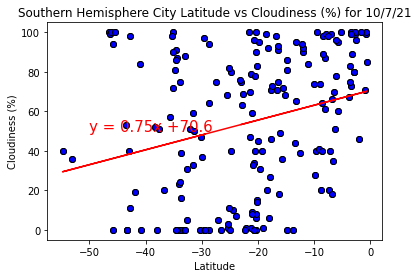

In [20]:
x_values = southern_cities["Lat"]
y_values = southern_cities["Cloudiness"]
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Southern Hemisphere City Latitude vs Cloudiness for 10/7/21")
plt.scatter(x_values, y_values, marker = "o", facecolors = "blue", edgecolors="black")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values, y_values, marker = "o", facecolors="blue", edgecolors="black")
plt.plot(x_values,regress_values,"r-")


plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Southern Hemisphere City Latitude vs Cloudiness (%)")
plt.annotate(line_eq,(-50,50),fontsize=15,color="red")


print(f"The r-value is: {rvalue**2}")

plt.savefig("../Southern_cloud_plot.png")

plt.show()


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.0040027370016874645


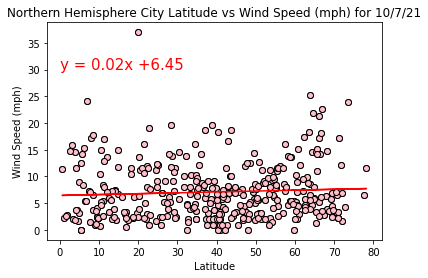

In [21]:
x_values = northern_cities["Lat"]
y_values = northern_cities["Wind Speed"]
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Northern Hemisphere City Latitude vs Wind Speed for 10/7/21")
plt.scatter(x_values, y_values, marker = "o", facecolors = "pink", edgecolors="black")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values, y_values, marker = "o", facecolors="pink", edgecolors="black")
plt.plot(x_values,regress_values,"r-")


plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Northern Hemisphere City Latitude vs Wind Speed (mph)")
plt.annotate(line_eq,(0,30),fontsize=15,color="red")


print(f"The r-value is: {rvalue**2}")

plt.savefig("../Northern_wind_plot.png")


plt.show()




####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04315164672725651


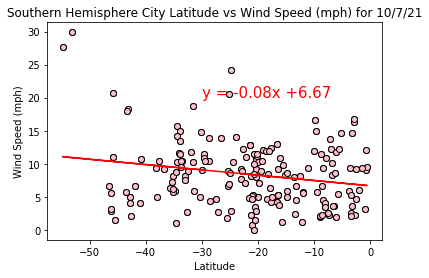

In [22]:
x_values = southern_cities["Lat"]
y_values = southern_cities["Wind Speed"]
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Southern Hemisphere City Latitude vs Wind Speed (mph) for 10/7/21")
plt.scatter(x_values, y_values, marker = "o", facecolors = "pink", edgecolors="black")
#plt.show()

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values, y_values, marker = "o", facecolors="pink", edgecolors="black")
plt.plot(x_values,regress_values,"r-")


plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Southern Hemisphere City Latitude vs Wind Speed (mph)")
plt.annotate(line_eq,(-30,20),fontsize=15,color="red")


print(f"The r-value is: {rvalue**2}")

plt.savefig("../Southern_wind_plot")


plt.show()


